**Function and modules for data preparation and visualization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import matplotlib
import sklearn

import warnings
warnings.filterwarnings('ignore')
import re
import os

**Function and modules for the supervised Classification models**

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

**Function and modules for data analysis and model evaluation**

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

**Read inputs & outputs (Data)**

In [4]:
df=pd.read_csv('Lung_GSE19804.csv',)

In [5]:
df.dropna()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,556,tumoral,12.014762,6.983442,6.540233,8.362803,3.780203,9.188556,5.674197,6.262662,...,13.391406,12.688067,14.222519,14.145409,10.784380,9.229371,10.030957,3.569567,4.249465,3.982578
1,557,tumoral,11.317501,7.243950,6.927529,8.374879,3.845977,8.546901,5.680735,5.811109,...,13.307399,12.579227,14.192594,14.145906,9.772229,7.742450,8.501174,3.532915,4.134520,3.917711
2,558,tumoral,10.868398,7.213200,7.110826,8.258420,4.074300,9.295490,5.494098,5.788352,...,13.747090,13.054736,14.391262,14.313572,11.928554,10.481570,11.281070,3.453530,4.226954,3.706964
3,559,tumoral,11.968264,8.003929,7.167021,8.794291,3.679181,8.404464,5.877476,5.746267,...,12.679800,11.850551,13.872564,13.703017,4.679738,4.777636,4.329992,3.568955,4.091501,3.881763
4,560,tumoral,11.770490,8.372459,7.797680,8.891273,3.925639,8.453391,5.767672,5.705104,...,12.879360,12.116750,14.203035,14.030176,12.906862,8.174265,11.247059,3.628792,3.968562,4.000934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,671,normal,10.665041,7.986403,8.665768,8.629122,3.709652,8.894375,5.581449,7.665577,...,12.375238,11.505884,13.747430,13.621898,9.623981,8.399394,9.085365,3.612295,4.314257,4.065976
110,672,normal,11.262465,7.897883,7.924439,8.693521,3.854990,8.532484,5.618647,7.861577,...,12.652311,11.768096,13.880073,13.790060,9.684019,8.638902,9.269559,3.600600,4.215128,4.087882
111,673,normal,10.908874,7.950512,7.883405,8.372966,3.749663,8.634664,5.408016,6.968167,...,11.994537,11.141030,13.411115,13.208020,9.929540,8.946906,9.314901,3.582078,4.137070,4.034034
112,674,normal,10.669563,8.106750,7.288045,8.717007,3.845833,8.745227,5.258879,7.521503,...,11.945885,11.088194,13.564856,13.382432,10.274626,9.103782,9.690056,3.519381,4.033439,3.997790


In [6]:
df.type.isnull().sum()

0

In [7]:
DF_RM_DUP = df.drop_duplicates()

In [8]:
dft=df.drop(columns = ['samples'])

In [9]:
dft.head()

,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,tumoral,12.014762,6.983442,6.540233,8.362803,3.780203,9.188556,5.674197,6.262662,9.220699,...,13.391406,12.688067,14.222519,14.145409,10.784380,9.229371,10.030957,3.569567,4.249465,3.982578
1,tumoral,11.317501,7.243950,6.927529,8.374879,3.845977,8.546901,5.680735,5.811109,8.687212,...,13.307399,12.579227,14.192594,14.145906,9.772229,7.742450,8.501174,3.532915,4.134520,3.917711
2,tumoral,10.868398,7.213200,7.110826,8.258420,4.074300,9.295490,5.494098,5.788352,10.384183,...,13.747090,13.054736,14.391262,14.313572,11.928554,10.481570,11.281070,3.453530,4.226954,3.706964
3,tumoral,11.968264,8.003929,7.167021,8.794291,3.679181,8.404464,5.877476,5.746267,8.973831,...,12.679800,11.850551,13.872564,13.703017,4.679738,4.777636,4.329992,3.568955,4.091501,3.881763
4,tumoral,11.770490,8.372459,7.797680,8.891273,3.925639,8.453391,5.767672,5.705104,8.795635,...,12.879360,12.116750,14.203035,14.030176,12.906862,8.174265,11.247059,3.628792,3.968562,4.000934


In [10]:
ord_enc = OrdinalEncoder()
dft["type"] = ord_enc.fit_transform(dft[["type"]])

In [11]:
X=dft.drop(columns = ['type'])

In [12]:
y=dft['type']
y=pd.DataFrame(y)

<AxesSubplot:xlabel='type'>

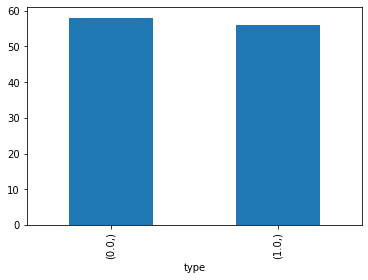

In [13]:
y.value_counts().plot(kind="bar")

# work with features as full data & classes or target for it's output

In [14]:
kfold=KFold(n_splits=10, random_state=42, shuffle=True)

# GridSearch Implementation 

## Knn

In [15]:
kn_classifier = KNeighborsClassifier()

In [16]:
param_grid_kn = {   
    'n_neighbors':[1,3,5,7,9,11,13,15],
    'weights':['uniform','distance'],
    'leaf_size':[10,30,],
}

In [17]:
kn_tuned =GridSearchCV(kn_classifier,param_grid=param_grid_kn, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy")

In [18]:
kn_tuned.fit(X, y.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'leaf_size': [10, 30],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [19]:
print(kn_tuned.best_score_)
print(kn_tuned.best_params_)

0.9212121212121211
{'leaf_size': 10, 'n_neighbors': 3, 'weights': 'uniform'}


## SVC

In [20]:
svc_classifier = SVC()

In [21]:
param_grid_svm = {
    'C': [1,5,10,15,20,.1,30],
    'gamma': [ 'scale','auto'],
    'kernel': ['rbf','linear'],
}

In [22]:
svc_tuned =GridSearchCV(svc_classifier,param_grid=param_grid_svm,verbose=2, n_jobs=4,cv=kfold,scoring ="accuracy" )

In [23]:
svc_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 5, 10, 15, 20, 0.1, 30],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [24]:
print(svc_tuned.best_score_)
print(svc_tuned.best_params_)

0.9643939393939395
{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}


# RF

In [25]:
rf_classifier = RandomForestClassifier()

In [26]:
param_grid_rf = {
    'n_estimators': [20,40,60,80,100,],
    'max_depth':[1,3,5,None],
    'criterion':['gini','entropy',],
    'max_features':['sqrt','log2',],
    'random_state':[42],
}

In [27]:
rf_tuned = GridSearchCV(
    rf_classifier, param_grid=param_grid_rf, cv=kfold, verbose=2, n_jobs=4,scoring ="accuracy" )

In [28]:
rf_tuned.fit(X,  y.values.ravel())

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy', verbose=2)

In [29]:
print(rf_tuned.best_score_)
print(rf_tuned.best_params_)

0.9553030303030303
{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 40, 'random_state': 42}


**Train Test Split :**

**we trained the features split percentages (Train: 65%, Test: 35%)**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42,)

## KNN

In [31]:
knn=KNeighborsClassifier()

In [32]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [33]:
knn.score(X_train, Y_train) #Train Score

0.9324324324324325

In [34]:
KNNaccuracy=knn.score(X_test, Y_test) #Test Score
KNNaccuracy

0.9

In [35]:
from sklearn.metrics import classification_report
y_pred=knn.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.90        19
         1.0       1.00      0.81      0.89        21

    accuracy                           0.90        40
   macro avg       0.91      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



## svm

In [36]:
svc =SVC()

In [37]:
svc.fit(X_train,Y_train)

SVC()

In [38]:
svc.score(X_train, Y_train) #Train Score

0.9459459459459459

In [39]:
SVCaccuracy=svc.score(X_test, Y_test) #Test Score
SVCaccuracy

0.925

In [40]:
from sklearn.metrics import classification_report
y_pred=svc.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        19
         1.0       1.00      0.86      0.92        21

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.92        40



## RF

In [41]:
rf =RandomForestClassifier()

In [42]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [43]:
rf.score(X_train, Y_train) #Train Score

1.0

In [44]:
RFaccuracy=rf.score(X_test, Y_test) #Test Score
RFaccuracy

0.95

In [45]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.90      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



### Before Feature Selection and Parameters Tuning

[(0.0, 100.0)]

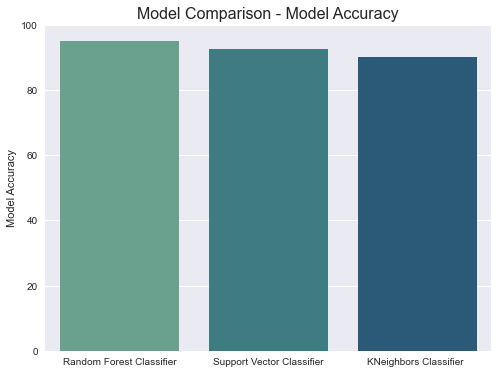

In [46]:
plt.style.use("seaborn")

l1 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

v1 = [RFaccuracy*100, 
     SVCaccuracy*100,
     KNNaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

# Feature selection Code :

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select=SelectKBest(chi2, k=2000)
X_train_selected = select.fit_transform(X_train, Y_train)
X_test_selected= select.transform(X_test)

# Evalutaed models

### Random Forest

In [48]:
rf_evalutaed =RandomForestClassifier(**rf_tuned.best_params_)

In [49]:
rf_evalutaed.fit(X_train_selected,Y_train)

RandomForestClassifier(max_depth=1, n_estimators=40, random_state=42)

In [50]:
rf_evalutaed.score(X_train_selected, Y_train) #Train Score

0.972972972972973

In [51]:
RFTaccuracy=rf_evalutaed.score(X_test_selected, Y_test) #Test Score
RFTaccuracy

0.975

In [52]:
from sklearn.metrics import classification_report
y_pred=rf_evalutaed.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.95      0.98        21

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



### SVC

In [53]:
svc_evalutaed =SVC(**svc_tuned.best_params_)

In [54]:
svc_evalutaed.fit(X_train_selected,Y_train)

SVC(C=20)

In [55]:
svc_evalutaed.score(X_train_selected, Y_train) #Train Score

1.0

In [56]:
SVCTaccuracy=svc_evalutaed.score(X_test_selected, Y_test) #Test Score
SVCTaccuracy

0.95

In [57]:
from sklearn.metrics import classification_report
y_pred=svc_evalutaed.predict(X_test_selected)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[19  0]
 [ 2 19]]
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.90      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



### KNeighbors

In [58]:
knn_evalutae=KNeighborsClassifier(**kn_tuned.best_params_)

In [59]:
knn_evalutae.fit(X_train_selected,Y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [60]:
knn_evalutae.score(X_train_selected, Y_train) #Train Score

0.9594594594594594

In [61]:
KNNTaccuracy=knn_evalutae.score(X_test_selected, Y_test) #Test Score
KNNTaccuracy

0.95

In [62]:
from sklearn.metrics import classification_report
y_pred=knn_evalutae.predict(X_test_selected)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.90      0.95        21

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



Genatic

## After Feature Selection

[(0.0, 100.0)]

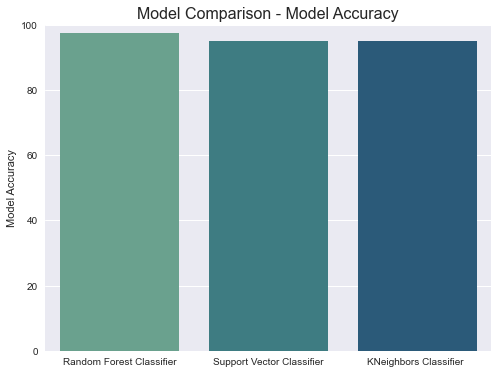

In [63]:
plt.style.use("seaborn")

l2 = ["Random Forest Classifier",  
     "Support Vector Classifier","KNeighbors Classifier "]

v2 = [RFTaccuracy*100, 
     SVCTaccuracy*100,
     KNNTaccuracy*100,]

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y, palette="crest");
plt.ylabel("Model Accuracy")
plt.title("Model Comparison - Model Accuracy", fontsize=16, fontname="arial", y=1);
ax.set(ylim=(0, 100))

In [65]:
from joblib import dump

dump(knn_evalutae, './lung_cancer_knn.joblib')
Y_test=Y_test.replace({0: 'Tumoral', 1: 'Normal'})
pd.DataFrame(Y_test).to_csv('lung_result.csv',)
pd.DataFrame(X_test_selected).to_csv('lung_test.csv',)